# 0. Install and Import Dependencies

In [29]:
!pip install stable-baselines3 gym-anytrading gymnasium

In [30]:
# Gym Environment Imports
import gymnasium as gym
import gym_anytrading

# Stable-Baselines3 Imports
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

# Other Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load MarketWatch Data

NVIDIA Corp. Historical Quotes from 10/30/2023 to 10/28/2024

In [31]:
df = pd.read_csv('data/NVDA.csv')

In [32]:
df.head()

,Date,Open,High,Low,Close,Volume
0,10/30/2024,139.54,140.33,136.81,139.34,"179,418,094"
1,10/29/2024,140.29,142.26,138.90,141.25,"157,593,594"
2,10/28/2024,143.00,143.14,140.05,140.52,"173,586,703"
3,10/25/2024,140.93,144.13,140.80,141.54,"205,122,094"
4,10/24/2024,140.82,141.35,138.46,140.41,"172,354,891"


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [34]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-30,139.54,140.33,136.81,139.34,"179,418,094"
2024-10-29,140.29,142.26,138.90,141.25,"157,593,594"
2024-10-28,143.00,143.14,140.05,140.52,"173,586,703"
2024-10-25,140.93,144.13,140.80,141.54,"205,122,094"
2024-10-24,140.82,141.35,138.46,140.41,"172,354,891"


In [35]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'forex-v0', 'stocks-v0'])

In [36]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, len(df)-1), window_size=5)

In [37]:
env.signal_features

/Users/danielgiaoo/Developer/GitHub/python-trading-bot-reinforcement-learning/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 1.3934e+02,  0.0000e+00],
       [ 1.4125e+02,  1.9100e+00],
       [ 1.4052e+02, -7.3000e-01],
       [ 1.4154e+02,  1.0200e+00],
       [ 1.4041e+02, -1.1300e+00],
       [ 1.3956e+02, -8.5000e-01],
       [ 1.4359e+02,  4.0300e+00],
       [ 1.4371e+02,  1.2000e-01],
       [ 1.3800e+02, -5.7100e+00],
       [ 1.3693e+02, -1.0700e+00],
       [ 1.3572e+02, -1.2100e+00],
       [ 1.3160e+02, -4.1200e+00],
       [ 1.3807e+02,  6.4700e+00],
       [ 1.3480e+02, -3.2700e+00],
       [ 1.3481e+02,  1.0000e-02],
       [ 1.3265e+02, -2.1600e+00],
       [ 1.3289e+02,  2.4000e-01],
       [ 1.2772e+02, -5.1700e+00],
       [ 1.2492e+02, -2.8000e+00],
       [ 1.2285e+02, -2.0700e+00],
       [ 1.1885e+02, -4.0000e+00],
       [ 1.1700e+02, -1.8500e+00],
       [ 1.2144e+02,  4.4400e+00],
       [ 1.2140e+02, -4.0000e-02],
       [ 1.2404e+02,  2.6400e+00],
       [ 1.2351e+02, -5.3000e-01],
       [ 1.2087e+02, -2.6400e+00],
       [ 1.1626e+02, -4.6100e+00],
       [ 1.1600e+02,

# 2. Test Environment

/Users/danielgiaoo/Developer/GitHub/python-trading-bot-reinforcement-learning/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


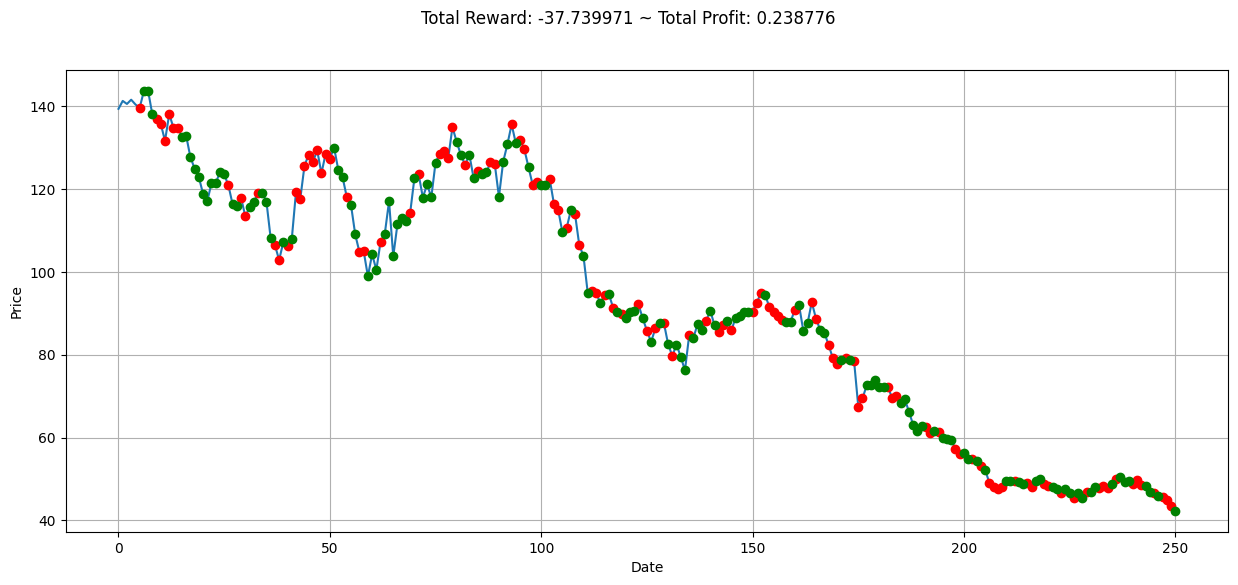

In [38]:
state = env.reset()
done = False
truncated = False

while not (done or truncated):
    # Take a random action
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(action)

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()